## 6317 Lab Jim ArcGIS API python


#### Run this cell to connect to your GIS and get started:

In [44]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as cxp220025@utdallas.edu_UTDEPPS with an administrator role, proceed with caution.
  warnings.warn(


### Write code to make a webmap centered on downtown Fort Worth, TX using the satellite basemap.

In [137]:
# Create a map centered on downtown Fort Worth, TX using satellite imagery
map1 = gis.map('Fort Worth, Texas', zoomlevel=15)
map1.basemap = 'satellite'
map1

MapView(layout=Layout(height='400px', width='100%'))

### Write code to make a webmap centered on the contiguous US, and add the latest COVID-19 case data.
#### 3.1 Use the Python API to search ArcGIS Online for an external layer owned by CSSE_covid19 (Johns Hopkins) titled "COVID-19 Cases US"

In [48]:
from arcgis.mapping import show_styles, display_colormaps
from arcgis.features import FeatureLayer

In [49]:
# Search for COVID-19 data owned by CSSE_covid19 (Johns Hopkins)
search_query = "owner:CSSE_covid19 title:'COVID-19 Cases US' type:Feature Service"
covid_data_search = gis.content.search(search_query, outside_org=True)
covid_data_search

[<Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Coronavirus COVID-19 Cases V2" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Coronavirus COVID-19 Cases" type:Feature Layer Collection owner:CSSE_covid19>]

In [109]:
# Find the "COVID-19 Cases US" Feature Layer
covid_layer = []
for item in covid_data_search:
    if item.title == "COVID-19 Cases US":
        covid_layer = item
        break

# Create a map centered on the contiguous US
map2 = gis.map('United States', zoomlevel=6)

# Add the COVID-19 layer to the map
if covid_layer:
    map2.add_layer(covid_layer)


map2

MapView(layout=Layout(height='400px', width='100%'))

### Using the same layer as #3, write code to make a new webmap that displays Texas County COVID Deaths
#### 4.1 Filter to just Texas counties (Province_State='Texas')
#### 4.2 Use a ClassedSizeRenderer on the "Deaths" field

In [51]:
from arcgis.mapping import show_styles
from arcgis.features import FeatureLayer

# Filter to just Texas counties (Province_State='Texas')
texas_county_layer = FeatureLayer(covid_layer.url)
query = "Province_State='Texas'"
texas_county_layer.filter = query

# Use a ClassedSizeRenderer on the "Deaths" field
class_size_renderer = {
    "renderer": "ClassedSizeRenderer",
    "field_name": "Deaths",
    "min_value": 0,
    "max_value": 5000,
    "min_size": 5,
    "max_size": 30,
    "symbol": {
        "color": [0, 0, 255, 128],
        "outline": {
            "color": [0, 0, 0, 255],
            "width": 0.5
        }
    }
}

texas_county_layer.renderer = class_size_renderer

# Create a map centered on Texas
map_texas = gis.map('Texas', zoomlevel=6)
map_texas.add_layer(texas_county_layer)

# Display the map
map_texas


MapView(layout=Layout(height='400px', width='100%'))

### Write code to make a webmap of parcel data
#### 5.1 Upload parcels.csv to your notebook (Go to Files->home and upload the CSV there)
#### 5.2 This location can be referenced in ArcGIS Notebooks as "/home/parcels.csv"
#### 5.3 Use a Unique Value SEDF renderer to color the parcels by school zone ("CAMPNAME")

In [135]:
from arcgis.mapping import show_styles
import pandas as pd
from arcgis import GeoAccessor

# Load the parcel data from the provided CSV file
file_path = "/arcgis/home/parcels.csv"
parcel_data = pd.read_csv(file_path)

# Convert the DataFrame to a Spatially Enabled DataFrame (SEDF)
parcel_sdf = pd.DataFrame.spatial.from_xy(parcel_data, 'x', 'y')

# Display available renderers
show_styles(geometry_type="POINT")

# Use Unique Value Renderer to color parcels by school zone ("CAMPNAME")
map_parcel = gis.map()
map_parcel.center = [32.9855, -96.7507]  # Center the map to an appropriate location

# Plot the parcel data using a Unique Value Symbology based on "CAMPNAME"
parcel_sdf.spatial.plot(map_widget=map_parcel,
                        renderer_type='u',
                        col='CAMPNAME')
map_parcel

MapView(layout=Layout(height='400px', width='100%'))

### Use pandas to make a histogram of the parcel market values ("market_value" field) [See Lab 5].

Text(0, 0.5, 'Count (log scale)')

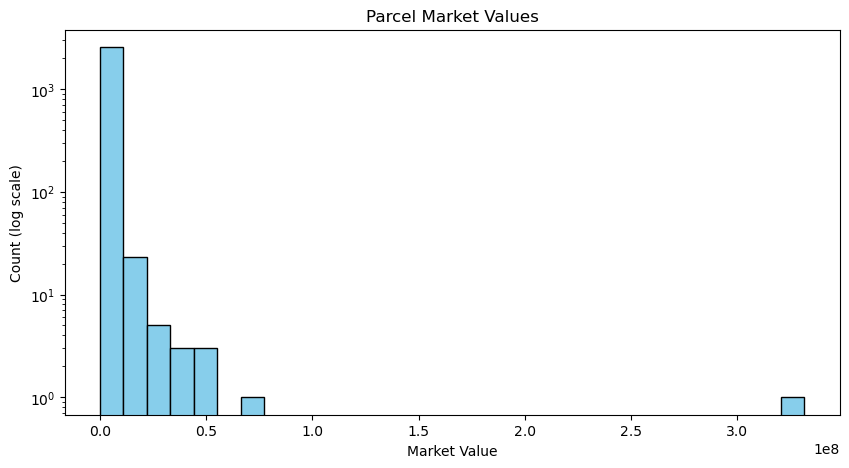

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the parcel data from the provided CSV file
file_path = "/arcgis/home/parcels.csv"
parcel_data = pd.read_csv(file_path)

# Create histograms of market values and living areas, logarithmically scaled
plt.figure(figsize=(10, 5))

# Histogram for Market Values
plt.hist(parcel_data['market_value'], bins=30, color='skyblue', edgecolor='black')
plt.yscale('log')
plt.title('Parcel Market Values')
plt.xlabel('Market Value')
plt.ylabel('Count (log scale)')




### Write code to make a new webmap of parcels colored by market value
#### 7.1 Use Class Breaks renderer with esriClassifyNaturalBreaks classification and 7 classes
#### 7.2 Use the YlGnBu color ramp
#### 7.3 Use the dark-grey basemap
#### 7.4 Add a legend

In [129]:
from arcgis.features import FeatureLayer

# Load the parcel data from the provided CSV file
file_path = "/arcgis/home/parcels.csv"
parcel_data = pd.read_csv(file_path)

# Convert the DataFrame to a Spatially Enabled DataFrame (SEDF)
parcel_sdf = pd.DataFrame.spatial.from_xy(parcel_data, 'x', 'y')

# Display available renderers
show_styles(geometry_type="POINT")

# Use Class Breaks Renderer to color parcels by market value
map_parcels = gis.map('Plano, Texas', zoomlevel=12)

# Set a dark-gray-vector basemap
map_parcels.basemap = 'dark-gray-vector'

# Plot the parcel data using a Class Breaks Renderer based on the original "market_value" (not logged)
parcel_sdf.spatial.plot(map_widget=map_parcels,
                        renderer_type='c',
                        method='esriClassifyNaturalBreaks',
                        class_count=7,
                        col='market_value',
                        cmap='YlGnBu')

# Add legend to the map
map_parcels.legend = True

map_parcels


MapView(layout=Layout(height='400px', width='100%'), legend=True)

SyntaxError: invalid syntax (1958729769.py, line 1)